Detection of heart disease

In [1]:
##1. import the libraries
import pandas as pd
import numpy as np
import math
from math import sqrt
import seaborn as sns
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model 
import matplotlib.pyplot as plt 

In [2]:
# 2.read the data set file
df = pd.read_csv('cardiovascular.csv')
df

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [3]:
# drop the "ind" it's not adding any value to the dataset
df=df.drop("ind",1)
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [ ]:
#3.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [ ]:
#4.
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


**Preprocessing Steps**

In [ ]:
# 5. Check if there is missing value
#df.isnull().sum()
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 0 missing values in data frame


In [ ]:
# 6. convert float values into integer, this will select float columns only
float_col = df.select_dtypes(include=['float64']) 
list(float_col.columns.values)
for col in float_col.columns.values:
   df[col] = df[col].astype('int64')
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12,5,23,Present,49,25,97,52,1
1,144,0,4,28,Absent,55,28,2,63,1
2,118,0,3,32,Present,52,29,3,46,0
3,170,7,6,38,Present,51,31,24,58,1
4,134,13,3,27,Present,60,25,57,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0,5,31,Absent,64,28,0,58,0
458,182,4,4,32,Absent,52,28,18,52,1
459,108,3,1,15,Absent,40,20,26,55,0
460,118,5,11,30,Absent,64,27,23,40,0


In [4]:
# 7.Convert categorical features to numerical using label encoding
df['famhist'] =df['famhist'].astype('category').cat.codes
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


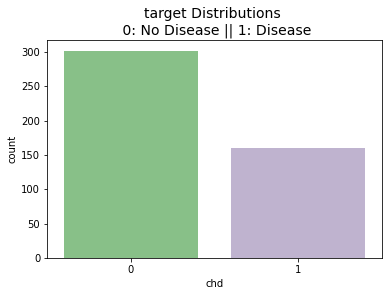

In [ ]:
# view how many 0 and 1 are in the class feature
import seaborn as sns
sns.countplot(x="chd", data=df, palette="Accent")
plt.title('target Distributions \n 0: No Disease || 1: Disease', fontsize=14)
plt.show()

**Quantitative assesment**

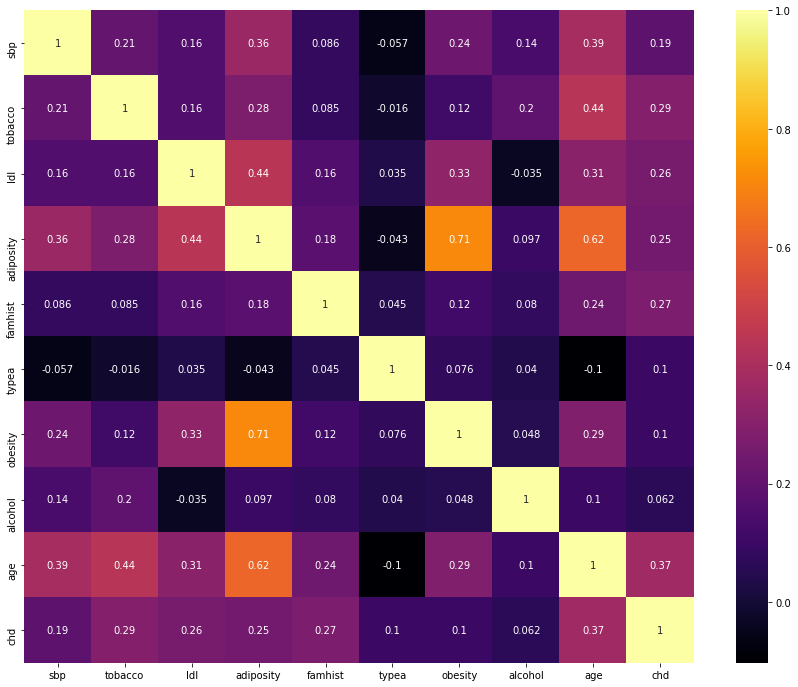

In [ ]:
# 10-Correlation Matrix
corr=df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap="inferno")

In [ ]:
## 11. What features have the maximum corrolation

def get_redundant_pairs(x):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, x.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(x, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(x)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print("---------------------------")
print(get_top_abs_correlations(df,5))

Top Absolute Correlations
---------------------------
adiposity  obesity      0.712768
           age          0.623542
ldl        adiposity    0.440699
tobacco    age          0.439720
sbp        age          0.388771
dtype: float64


The Significant Value of the Features
Feature: 0, Score: 51.948
Feature: 1, Score: 86.342
Feature: 2, Score: 42.997
Feature: 3, Score: 28.365
Feature: 4, Score: 57.872
Feature: 5, Score: 33.206
Feature: 6, Score: 93.462
Feature: 7, Score: 83.439
Feature: 8, Score: 50.617


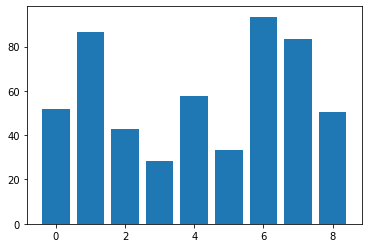

In [ ]:
# 12. Calculate The Significant Value of the Features
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

X, y = make_regression(n_samples=462, n_features=9, n_informative=9, random_state=1)
model = LinearRegression()
model.fit(X, y) # fit the model

importance = model.coef_   # get importance
#summarize feature importance
#Features=['sbp',	'tobacco',	'ldl'	, 'adiposity'	,'famhist',	'typea',	'obesity',	'alcohol',	'age']
print("The Significant Value of the Features")
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.3f' % (i,v))

# plot feature importance
plt.show()
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [5]:
# remove the features with low significant value score
df=df.drop(['adiposity','typea'],axis=1)
df

,sbp,tobacco,ldl,famhist,obesity,alcohol,age,chd
0,160,12.00,5.73,1,25.30,97.20,52,1
1,144,0.01,4.41,0,28.87,2.06,63,1
2,118,0.08,3.48,1,29.14,3.81,46,0
3,170,7.50,6.41,1,31.99,24.26,58,1
4,134,13.60,3.50,1,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,0,28.45,0.00,58,0
458,182,4.20,4.41,0,28.61,18.72,52,1
459,108,3.00,1.59,0,20.09,26.64,55,0
460,118,5.40,11.61,0,27.35,23.97,40,0


In [6]:
# 13. Normalization: Scale the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
df_scale= preprocessing.MinMaxScaler().fit_transform(df)
df_scale=pd.DataFrame(df_scale, columns=['sbp',	'tobacco',	'ldl'	,'famhist',	'obesity',	'alcohol',	'age','chd'])
# Separate the target from the data set
X = df_scale.drop(['chd'], axis=1)
y = df_scale['chd']

**Split the data set into training and testing sets**

In [7]:
# 14.Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print('Training instances Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing instances Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training instances Shape: (323, 7)
Training Labels Shape: (323,)
Testing instances Shape: (139, 7)
Testing Labels Shape: (139,)


In [9]:
# 15.Build the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=2000, random_state=42)
dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"DT" : dec,
          "RF" : ran,
          "MLP" :mlp,
          "KNN" : knn,
          "SVM" : svm,
          "NB" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train,y_train)
    scores[key] = model.score(X_test, y_test)

In [10]:
# 16.Measure the Accuracy
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.762590
KNN,0.741007
NB,0.741007
MLP,0.733813
RF,0.669065
DT,0.661871


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

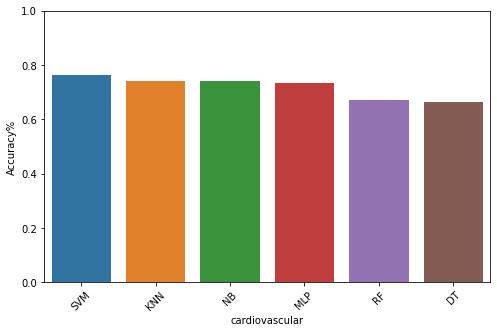

In [11]:
# 17.PLOT THE RESULTS
plt.figure(figsize=(8,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.ylim(0, 1)
plt.ylabel("Accuracy%")
plt.xlabel("cardiovascular")
plt.xticks(rotation=45)

# **Evaluation Metrics**

In [12]:
# Recall, F1-Score, Precision
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit

def evaluate_results(gtestLabels, gTestPred):
    d_accuracy = round(accuracy_score(gtestLabels, gTestPred), 4)
    v_recall = np.round(recall_score(gtestLabels, gTestPred, average = None), 4)
    v_prec = np.round(precision_score(gtestLabels, gTestPred, average = None), 4)
    
    d_recallAvg = np.round(recall_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    d_precAvg = np.round(precision_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    v_summaryReport = classification_report(gtestLabels, gTestPred, digits = 4)

    print('\n')
    print(v_summaryReport)

    #print('\n')
    #print("d_accuracy" + '\t' + str(d_accuracy))
    #print("v_recall" + '\t' + str(v_recall[0]) + '\t' + str(v_recall[1]) + '\t' + str(d_recallAvg))
    #print("v_prec" + '\t' + str(v_prec[0]) + '\t' + str(v_prec[1]) + '\t' + str(d_precAvg))
    
test_predictions = model.predict(X_test)
evaluate_results(y_test, test_predictions)



              precision    recall  f1-score   support

         0.0     0.7767    0.8602    0.8163        93
         1.0     0.6389    0.5000    0.5610        46

    accuracy                         0.7410       139
   macro avg     0.7078    0.6801    0.6887       139
weighted avg     0.7311    0.7410    0.7318       139



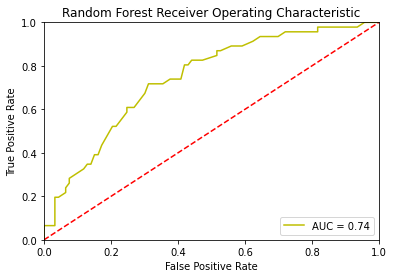

In [13]:
##### ROC ######################
# 1. Random Forest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature

ran = RandomForestClassifier()
ran.fit(X_train, y_train)
probs = ran.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('Random Forest Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

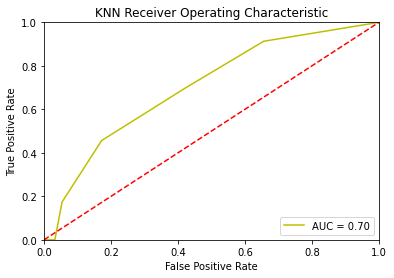

In [ ]:
#2. KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
probs = knn.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('KNN Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

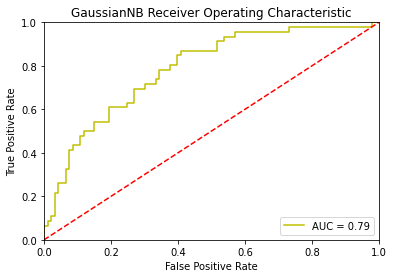

In [ ]:
#3.Gnaive B 
naive = GaussianNB()
naive.fit(X_train, y_train)
probs = naive.predict_proba(X_test)


malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('GaussianNB Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

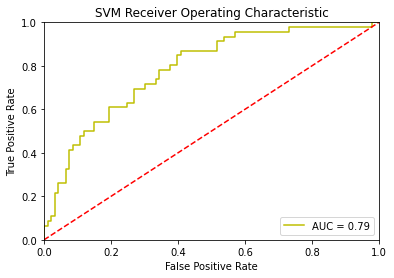

In [ ]:
#SVM
svm = SVC()
svm.fit(X_train, y_train)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('SVM Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#5.DT

dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)
probs = dec.predict_proba(X_test)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('SVM Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()